# Introduction to PyTorch

In [ ]:
import torch

Defining a tensor and its attributes is pretty much similar to what we had in numpy.

One special attrbiute here is the `device`, that shows the device our tensor is stored on. If it shows `cpu`, it is on cpu like any other data structure. If it shows `cuda` (or `cuda:0`, `cuda:1`, ...) it means that is being used by a GPU on the system.

You can make a copy of a torch tensor on GPU, by `.to(cuda)` command on the torch tensor (you can store this in the original tensor to transfer it to GPU device)

In [ ]:
#TODO
# Print the tensor, its shape, and its device of the below tensor.
# Then move it to "cuda:0" by calling .to() on it and storing it again. Then print the device again.
t=torch.tensor([1,2,3])

### Creating tensors

You can create tensors from lists just like numpy. You can also use:


*   `torch.ones(shape)`: creating a torch tensor of shape `shape` (like `[x, y, z]`) with 1s
*   `torch.zeros(shape)`: creating a torch tensor of shape `shape` (like `[x, y, z]`) with 0s
*   `torch.eye(n)`: creating a torch identical nxn tensor
*   `torch.rand(shape)` or `torch.randn(shape)`: creating a torch tensor of shape `shape` (like [x, y, z]) with random values between 0 and 1
*   `torch.arange(start, end, step)`: creating a 1-D array of the range start to end (without end itself) with step size step. By default, start is 0 and step is 1.


*   `torch.randint(low, high, shape)`: Creates random integer numbers bigger or equal to low (set to zero by default) and smaller than high






In [ ]:
#TODO:

# Create a ones torch and a zeros torch of shape (2, 3, 4).
# Also create an identical 5x5 torhc tensor.
# Create a torch tensor of 10 random integers in the range [2, 7] in the shape of (5, 2)
# Print these tensors and their shapes.

### Torch Indexing

You can access elements and index torch tensors similar to numpy:


*   `array[x][y]`: accessing an element (here in a 2-d tensor)


You can index by specifying the range in any of the dimensions using something like `x:y`. This way all the indices that are bigger or equal to x and smaller that y are selected. You can specify such intervals in any of the dimensions. For instance:


*   `array[x0: y0, x1: y1, x2: y2, ...]`



In [ ]:
#TODO
# Create a random torch tensor of integers in the range [4, 10) named big_tensor of shape (5, 3, 4)
# and create another array small_tensor and index it arbitrarily in the three dimensions
# Print these two tensors and their shapes.
# Also print the element on index 4,0,2.


### Convert numpy array to tensors (and vice versa)

If you have a numpy array, you can convert it to a tensor using `torch.as_tensor(array)` or `torch.from_numpy(array)`.

You can also convert a `tensor` to numpy array by calling `.numpy()` function on it.

In [ ]:
#TODO

# Convert the above numpy array to a torch tensor, then convert it back to a numpy array.
# print their types using "type(x)".
import numpy as np

r=np.array([[1,2,3, 4], [5, 6, 7, 8]])

### Tensor Manipulation

You can reshape, flatten, or transpose a torch tensor:



You can change the shape of a tensor by just reordering the elements in it and turn it into another tensor with a new shape but with equal total size.

If `t` is a torch tensor:



*   `t.reshape(new_shape)`: reshapes `t` to a new tensor with the shape `new_shape`

*   `t.flatten()`: converts the whole tensor into one 1-d vector.



*   `t.T`: transposes the tensor (reversing its shape)



In [ ]:
#TODO

# Create a random torch tensor with shape (3, 4). Then reshape it to another one of shape (2, 6).
# Also, transpose and flatten it separately.
# Print the shapes and elements of all tensors.

### Mathematical Operations:

You can get the sum, min, max, and mean over a tensor over any axis. **If you don't specify any axis, these functions are calculated over the whole array.**

If you have the `t` tensor, then we have:

 - `t.sum(axis)`
   
 - `t.mean(axis)`

- `t.min(axis)`

- `t.max(axis)`

In [ ]:
#TODO

# Make a random 2-d torch tensor with values [0,10]. Then get the overall and axis-wise sum, mean, min, and max.

### Arithmetic Functions:

If `t1` and `t2` are two tensors, we have:




*   `t1 + t2`
*   `t1 - t2`


*   `t1 * t2` (element-wise)


*   `t1 @ t2` (matrix multiplication)



*   `t1 * num`









In [ ]:
#TODO
# Create two torch tensors of shape (3, 3).
# Add, subtract, and muliply them, once element-wise and once with matrix multiplication.

# Autograd

In [ ]:
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)
print(x.grad)

In [ ]:
y = x * x * 3 # 3x^2
y.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

## Computational graph


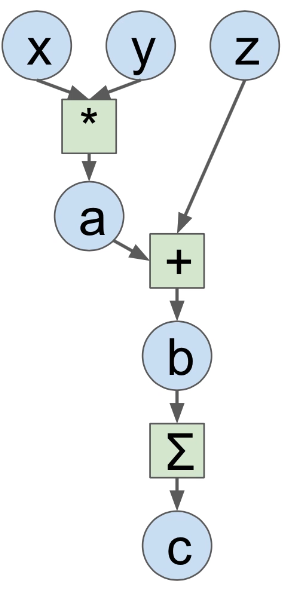

In [ ]:
import numpy as np
N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

grad_c = 1.
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

print('grad_x :\n ',grad_x,'\n')
print('grad_y :\n ',grad_y,'\n')
print('grad_z :\n ',grad_z,'\n')


In [ ]:
import torch

N, D = 3, 4
# x = torch.randn((N, D), requires_grad=True)
# y = torch.randn((N, D), requires_grad=True)
# z = torch.randn((N, D), requires_grad=True)

# x = torch.from_numpy(x)
# y = torch.from_numpy(x)
# z = torch.from_numpy(x)


x = torch.tensor(x,requires_grad=True)
y = torch.tensor(y,requires_grad=True)
z = torch.tensor(z,requires_grad=True)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()

print('grad_x :\n ',x.grad,'\n')
print('grad_y :\n ',y.grad,'\n')
print('grad_z :\n ',z.grad)